# Confidence Interval

## 1. Standardization

Suppose that we have a randomly distributed random variable $\bar{X} \sim \mathcal{N}(\mu, \sigma)$. Standardizing a normal distribution is to convert a normal-distibution to the standard normal-distribution defined by $\mathcal{N}(\mu = 0, \sigma=1)$. Therefore, we can convert $\bar{X}$ to $\bar{Z} \sim \mathcal{N}(0, 1)$ as follows:

$$\bar{Z} = \dfrac{\bar{X} - \mu}{\sigma}$$

## 2. Confidence Interval

The confidence interval is the range of values that you expect your estimate to fall between a certain percentage of the time if you run your experiment again or re-sample the population in the same way. It is the mean of the estimate plus and minus the variation in that estimate. If you construct a confidence interval with a 95% confidence level, you are confident that 95 of 100 times the estimate will fall between the upper and the lower values specified by the confidence interval.

### 2.1 Calculating Confidence Interval

$\bar{X}$ is our point estimate of the sample mean.

$$\bar{X} \sim \mathcal{N}\left(\mu, \sigma^2/N \right)$$

, where $N$ is the sample size. We now stadardize the estimate. We first subtract $\mu$

$$\bar{X} - \mu \sim \mathcal{N}\left(0, \sigma^2/N \right)$$

And then divide using the standard deviation $\sigma / \sqrt{N}$

$$\dfrac{\bar{X} - \mu}{\sigma / \sqrt{N}} \sim \mathcal{N}\left(0, 1\right)$$

95% confidence interval for a standard normal is defined as follows:

$$-1.96 \le \dfrac{\bar{X}-\mu}{\sigma \sqrt{N}} \le 1.96$$

After rearranging we get:

$$\bar{X} - 1.96\dfrac{\sigma}{\sqrt{N}} \le \mu \le \bar{X} + 1.96\dfrac{\sigma}{\sqrt{N}}$$


## 3. Confidence Level

The confidence level is the percentage of times you expect to reproduce an estimate between the upper and lower bounds of the confidence interval. The desired confidence level is usually one minus the $\alpha$ value used in your statistical test:

$$\textrm{confidence level} = 1 - \alpha$$

So if you use an $\alpha$ value of $p \lt 0.05$ for **statistical significance**, then your confidence level would be $1 - 0.05 = 0.95$.

If the data follows a normal distribution, or if the sample size is large (n>30) that is normally distributed, then you can use **z-distribution** for finding the critical values. However, if a small dataset (n<30) that is normally distributed is used, then **t-distribution** is used instead. In the case of the t-distribution, degrees of freedom is sample size minus 1.


| Confidence level | 90%  |  95%  |  99$  |
|------------------|------|-------|-------|
| one tailed CI    | 0.1  | 0.05  | 0.01  |
| two tailed CI    | 0.05 | 0.025 | 0.005 |
| z statistic      | 1.64 | 1.96  | 2.57  |



In [1]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Download the S&P500 data from Kaggle
od.download("https://www.kaggle.com/datasets/camnugent/sandp500/download?datasetVersionNumber=4")
df = pd.read_csv('./sandp500/all_stocks_5yr.csv', parse_dates=True)
df.head()

Skipping, found downloaded files in "./sandp500" (use force=True to force download)


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
sbux = df[df['Name'] == 'SBUX']
sbux.insert(len(sbux.columns), 'return', sbux['close'].pct_change(1))
sbux.head()

,date,open,high,low,close,volume,Name,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,-0.005015


In [4]:
values = sbux['return'].dropna().to_numpy()
m = values.mean()
s = values.std(ddof=1)

In [5]:
low = m - 1.96 * s / np.sqrt(len(values))
high = m + 1.96 * s / np.sqrt(len(values))

In [6]:
print(f"Mean of returns: {m}")
print(f"Standard deviation of returns: {s}")
print(f"Skewness of returns: {sbux['return'].skew()}")
print(f"Kurtosis of returns: {sbux['return'].kurtosis()}")
print(f"Confidence interval (returns), low limit: {low}")
print(f"Confidence interval (returns), high limit: {high}")

Mean of returns: 0.0006002332205830914
Standard deviation of returns: 0.012360934026133879
Skewness of returns: -0.2680784195824153
Kurtosis of returns: 5.593158903424731
Confidence interval (returns), low limit: -8.283965370502102e-05
Confidence interval (returns), high limit: 0.001283306094871204


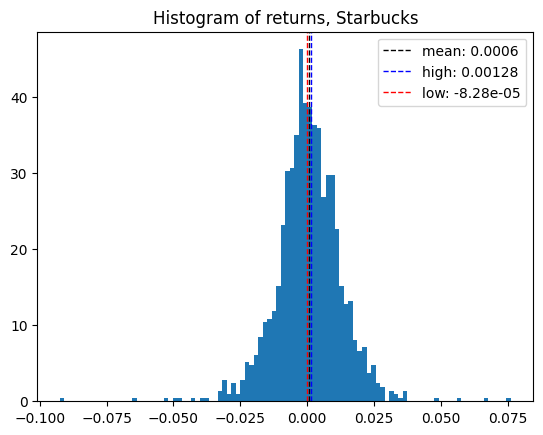

In [9]:
plt.hist(values, bins=100, density=True)
plt.axvline(values.mean(), color='k', linestyle='dashed', linewidth=1, label=f'mean: {values.mean():0.3}')
plt.axvline(high, color='b', linestyle='dashed', linewidth=1, label=f'high: {high:0.3}')
plt.axvline(low, color='r', linestyle='dashed', linewidth=1, label=f'low: {low:0.3}')
plt.title('Histogram of returns, Starbucks')
plt.legend()
plt.show()

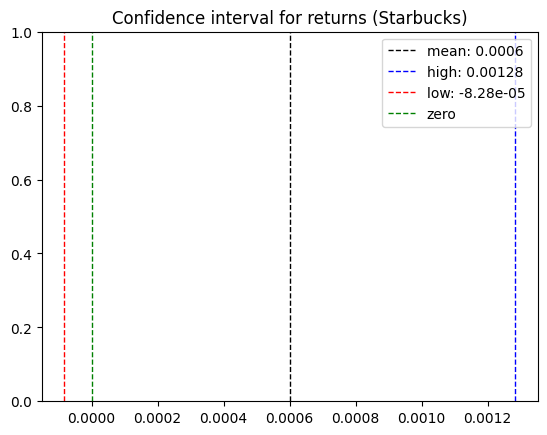

In [8]:
plt.axvline(values.mean(), color='k', linestyle='dashed', linewidth=1, label=f'mean: {values.mean():0.3}')
plt.axvline(high, color='b', linestyle='dashed', linewidth=1, label=f'high: {high:0.3}')
plt.axvline(low, color='r', linestyle='dashed', linewidth=1, label=f'low: {low:0.3}')
plt.axvline(0, color='g', linestyle='dashed', linewidth=1, label=f'zero')
plt.legend()
plt.title('Confidence interval for returns (Starbucks)')
plt.show()

From the above confidence interval figure we can see that the low-limit for the confidence interval for returns is below zero returns. What this means in practice is that it is possible that we get zero returns from the stock in question.